In [0]:
# !pip install keras
# !pip install tensorflow (CPU VERSION)
# !pip install tensorflow-gpu (GPU VERSION)

import csv
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

In [2]:
t= pd.read_csv('https://raw.githubusercontent.com/serivan/mldmlab/master/Datasets/Kaggle2020/train.csv')
t.to_csv('train.csv', index=False)

#sistemo CSV
with open('train.csv') as f_in, open('new_train.csv', 'w') as f_out:
    #crea il nuovo csv
    filewriter = csv.writer(f_out, delimiter=',')
    # Write header unchanged
    header = f_in.readline()
    f_out.write(header)

    reader = csv.reader(f_in)
    lines = list(reader)

    for line in lines:
        if line[2] != '' and float(line[2])>100:
            line[2]=float(line[2])/1000
        if line[8] != '' and float(line[8])>100:
            line[8]=float(line[8])/1000
    
    writer = csv.writer(f_out)
    writer.writerows(lines)

f_in.close()
f_out.close()


train = pd.read_csv('new_train.csv')
# pull data into target (y) and predictors (X)
train["Quality"] = np.where(train["Quality"].str.contains("Good"), 1, 0)
train_y = train.Quality
#tengo volatile e density perchè li ho sistemati
predictor_cols = ['fixed.acidity','volatile.acidity','citric.acid','residual.sugar','chlorides','free.sulfur.dioxide',
                  'total.sulfur.dioxide','density','pH','sulphates','alcohol']
# Create training predictors data
train_X = train[predictor_cols]

scaler = StandardScaler()

train_X_std = scaler.fit_transform(train_X)

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(train_X_std)

# Impute our data, then train
train_X_imp = imp.transform(train_X_std)
print(train_X_imp.shape)

(3489, 11)


In [3]:
print(train_X_imp[0])

[-0.5457457   1.11042087 -1.04758863 -1.03382143  0.01255654 -0.01995263
 -0.07076563 -0.6089061  -0.23888975 -0.25872393 -0.23991364]


In [0]:
import tensorflow as tf

# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [15]:

model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy',tf.keras.metrics.AUC()])
                   
training_phase =model.fit(train_X_imp, train_y,epochs=10, batch_size=1,  validation_split=0.2, verbose=1)

Train on 2791 samples, validate on 698 samples
Epoch 1/10
2791/2791 [==============================] - 4s 1ms/step - loss: 0.5439 - accuracy: 0.7155 - auc_1: 0.6557 - val_loss: 0.5011 - val_accuracy: 0.7765 - val_auc_1: 0.7676
Epoch 2/10
2791/2791 [==============================] - 3s 1ms/step - loss: 0.4929 - accuracy: 0.7564 - auc_1: 0.7833 - val_loss: 0.4858 - val_accuracy: 0.7722 - val_auc_1: 0.7957
Epoch 3/10
2791/2791 [==============================] - 3s 1ms/step - loss: 0.4847 - accuracy: 0.7632 - auc_1: 0.8011 - val_loss: 0.4731 - val_accuracy: 0.7736 - val_auc_1: 0.8058
Epoch 4/10
2791/2791 [==============================] - 3s 1ms/step - loss: 0.4759 - accuracy: 0.7621 - auc_1: 0.8089 - val_loss: 0.4838 - val_accuracy: 0.7708 - val_auc_1: 0.8123
Epoch 5/10
2791/2791 [==============================] - 3s 1ms/step - loss: 0.4743 - accuracy: 0.7635 - auc_1: 0.8142 - val_loss: 0.4798 - val_accuracy: 0.7751 - val_auc_1: 0.8164
Epoch 6/10
2791/2791 [==============================]

loss


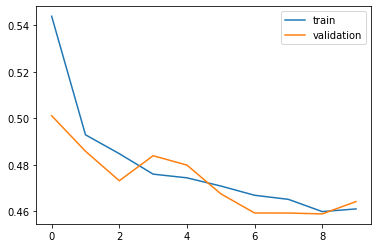

Accuracy


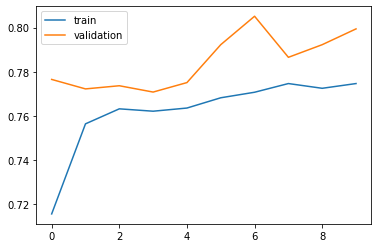

In [16]:
    import matplotlib.pyplot as pyplot
    
    # plot training history
    print("loss")
    pyplot.plot(training_phase.history['loss'], label='train')
    pyplot.plot(training_phase.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()
    
    print("Accuracy")
    pyplot.plot(training_phase.history['accuracy'], label='train')
    pyplot.plot(training_phase.history['val_accuracy'], label='validation')
    pyplot.legend()
    pyplot.show()

In [17]:
    #TEST SET
    t= pd.read_csv('https://raw.githubusercontent.com/serivan/mldmlab/master/Datasets/Kaggle2020/test.csv')
    t.to_csv('test.csv', index=False)

    #sistemo csv
    with open('test.csv') as f_in, open('new_test.csv', 'w') as f_out:
        #crea il nuovo csv
        filewriter = csv.writer(f_out, delimiter=',')
        # Write header unchanged
        header = f_in.readline()
        f_out.write(header)

        reader = csv.reader(f_in)
        lines = list(reader)

        for line in lines:
            if line[2] != '' and float(line[2])>100:
                line[2]=float(line[2])/1000
            if line[8] != '' and float(line[8])>100:
                line[8]=float(line[8])/1000

        writer = csv.writer(f_out)
        writer.writerows(lines)

    f_in.close()
    f_out.close()

    test = pd.read_csv('new_test.csv')
    # Treat the test data in the same way as training data. In this case, pull same columns.
    test_X = test[predictor_cols]

    test_X_std = scaler.transform(test_X)

    # Impute each test item, then predict
    test_X_imp = imp.transform(test_X_std)

    # Use the model to make predictions
    predicted_q = model.predict(test_X_imp)
    # We will look at the predicted Qualities to ensure we have something sensible.
    predicted_q = [round(x[0]) for x in predicted_q]

    for i in range (0,len(predicted_q)):
        predicted_q[i]=int(predicted_q[i])

    print(predicted_q)

    #prepare kaggle submission
    my_submission = pd.DataFrame({'Id': test.Id, 'Quality': predicted_q})
    # you could use any filename. We choose submission here
    my_submission.to_csv('submission.csv', index=False)

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 